# Objective 

# Import Libraries

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [8]:
connection=sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [10]:
cursor.execute("""select name from sqlite_master where type='table';""")
print('List of Tables present in the database')
table_list=[table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Reading Data

In [13]:
aircrafts_data= pd.read_sql_query("select * from aircrafts_data",connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [16]:
airports_data= pd.read_sql_query("select * from airports_data",connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [18]:
boarding_passes= pd.read_sql_query("select * from boarding_passes",connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [20]:
bookings= pd.read_sql_query("select * from bookings",connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [21]:
flights= pd.read_sql_query("select * from flights",connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [22]:
seats= pd.read_sql_query("select * from seats",connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [23]:
ticket_flights= pd.read_sql_query("select * from ticket_flights",connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [25]:
tickets= pd.read_sql_query("select * from tickets",connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [29]:
for table in table_list:
    print('\n Table : ',table)
    column_info=connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


 Table :  aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

 Table :  airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

 Table :  boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

 Table :  bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

 Table :  flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

 Table :  seats
('aircraft_code', 'character(3)')
('seat_no', 'c

In [33]:
for table in table_list:
    print('\n Table : ',table)
    df_table=pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())


 Table :  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 Table :  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 Table :  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 Table :  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 Table :  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 Table :  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 Table :  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 Table :  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int

# Basis Analysis

In [38]:
pd.read_sql_query("""select aircraft_code,count(*) as num_of_seats from seats group by aircraft_code having num_of_seats>150 """,connection)

,aircraft_code,num_of_seats
0,321,170
1,763,222
2,773,402


In [44]:
tickets= pd.read_sql_query("""select * from tickets 
inner join bookings on tickets.book_ref=bookings.book_ref""",connection)
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x= tickets.groupby('date')[['date']].count()

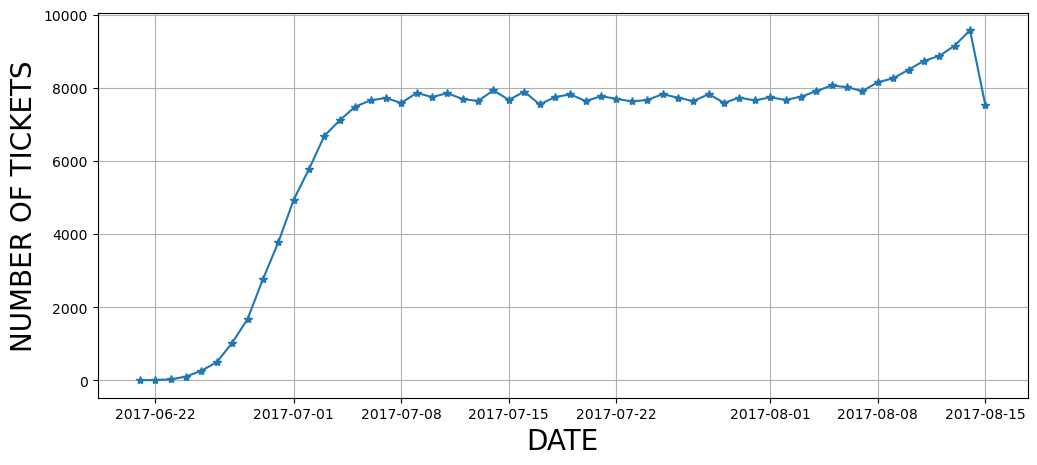

In [50]:
plt.figure(figsize=(12,5))
plt.plot(x.index,x['date'],marker='*')
plt.xlabel('DATE',fontsize=20)
plt.ylabel('NUMBER OF TICKETS',fontsize=20)
plt.grid('b')
plt.show()

In [51]:
bookings= pd.read_sql_query("""select * from bookings""",connection)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date
x= bookings.groupby('date')[['total_amount']].count()

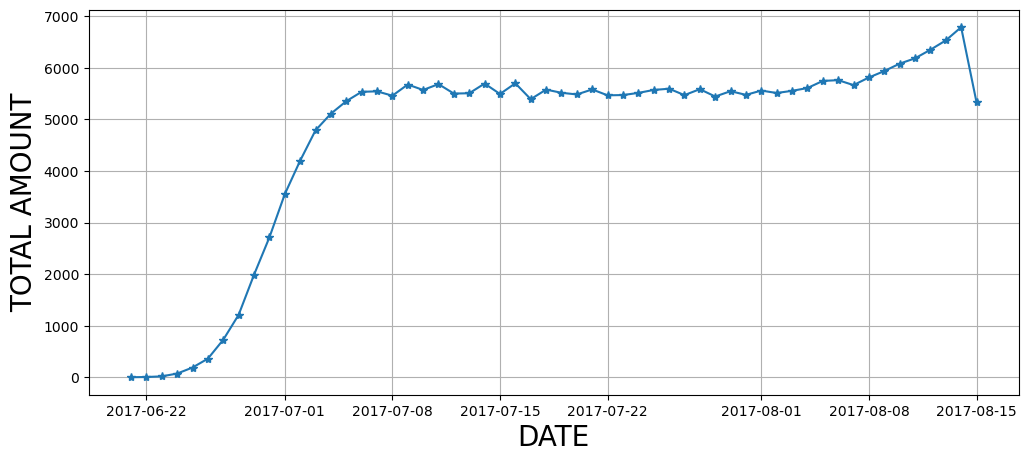

In [53]:
plt.figure(figsize=(12,5))
plt.plot(x.index,x['total_amount'],marker='*')
plt.xlabel('DATE',fontsize=20)
plt.ylabel('TOTAL AMOUNT',fontsize=20)
plt.grid('b')
plt.show()

In [57]:
df= pd.read_sql_query("""select fare_conditions,aircraft_code,avg(amount) 
                from ticket_flights join flights 
                on ticket_flights.flight_id=flights.flight_id 
                group by aircraft_code,fare_conditions""",connection)

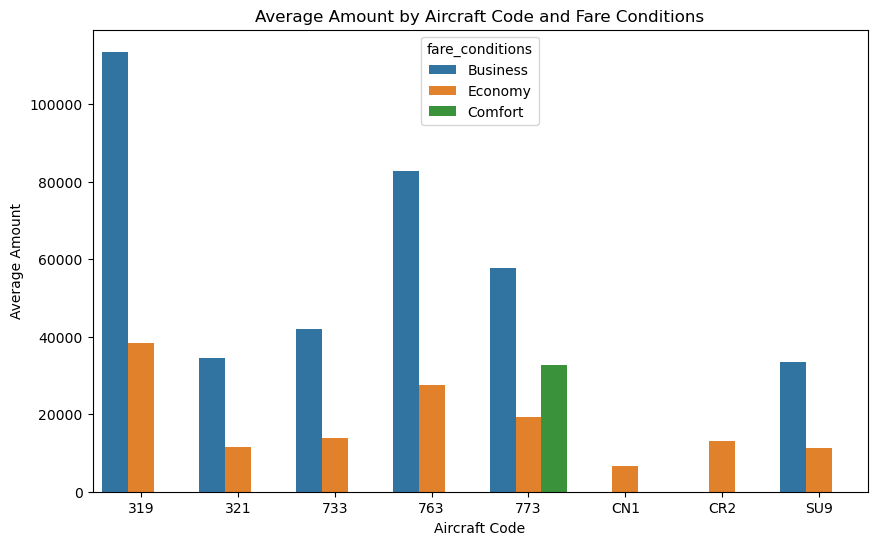

In [67]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='aircraft_code', y='avg(amount)', hue='fare_conditions', ci=None)
plt.xlabel('Aircraft Code')
plt.ylabel('Average Amount')
plt.title('Average Amount by Aircraft Code and Fare Conditions')

# Show the plot
plt.show()